_Author: A. Spiga (LMD / Sorbonne Université)_

In [1]:
import apss_lib
import numpy as np
import ppplot
from matplotlib.cm import get_cmap
%matplotlib inline

2019-12-11 15:17:46.295603


In [2]:
### common settings
dsol = 1
timetype = "LTST"
ww = 2000

In [3]:
### variable settings
filenamet = ["allgw","allbore"]
colormt = ["magma","brg"]
solmint = [123,53]
solmaxt = [152,82]
mintt = [17.5,17.5]
maxtt = [23.5,21.5]

APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0123_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0124_01.npy
APSS_LIB: smoothresample done in 9 seconds
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0125_01.npy
APSS_LIB: smoothresample done in 9 seconds
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0126_01.npy
APSS_LIB: smoothresample done in 9 seconds
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0127_01.npy
APSS_LIB: smoothresample done in 11 seconds
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InS

APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0072_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0073_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0074_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0075_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0076_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0077_01.npy
APSS_LIB: ---------- GETDATA ----------
APSS_LIB: using existing local Python binary file: /home/aspiga/data/InSight/npy//ps_calib_0078_01.npy

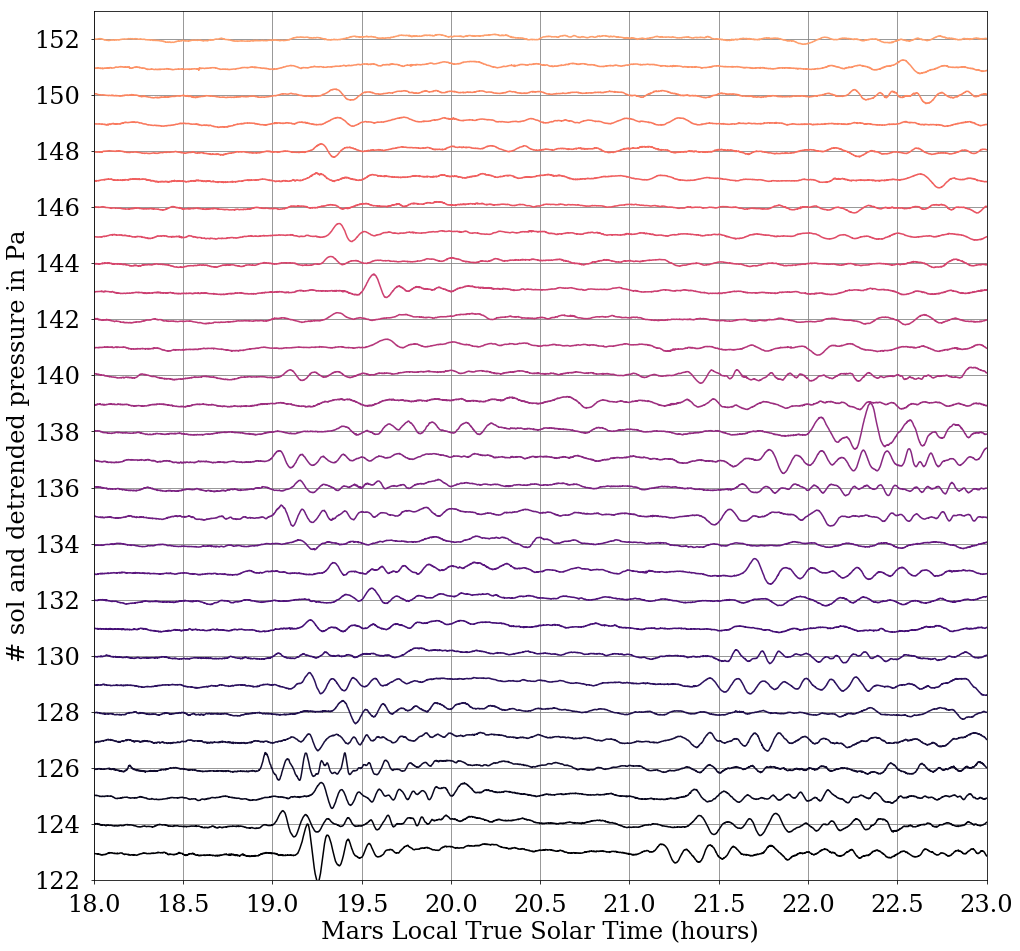

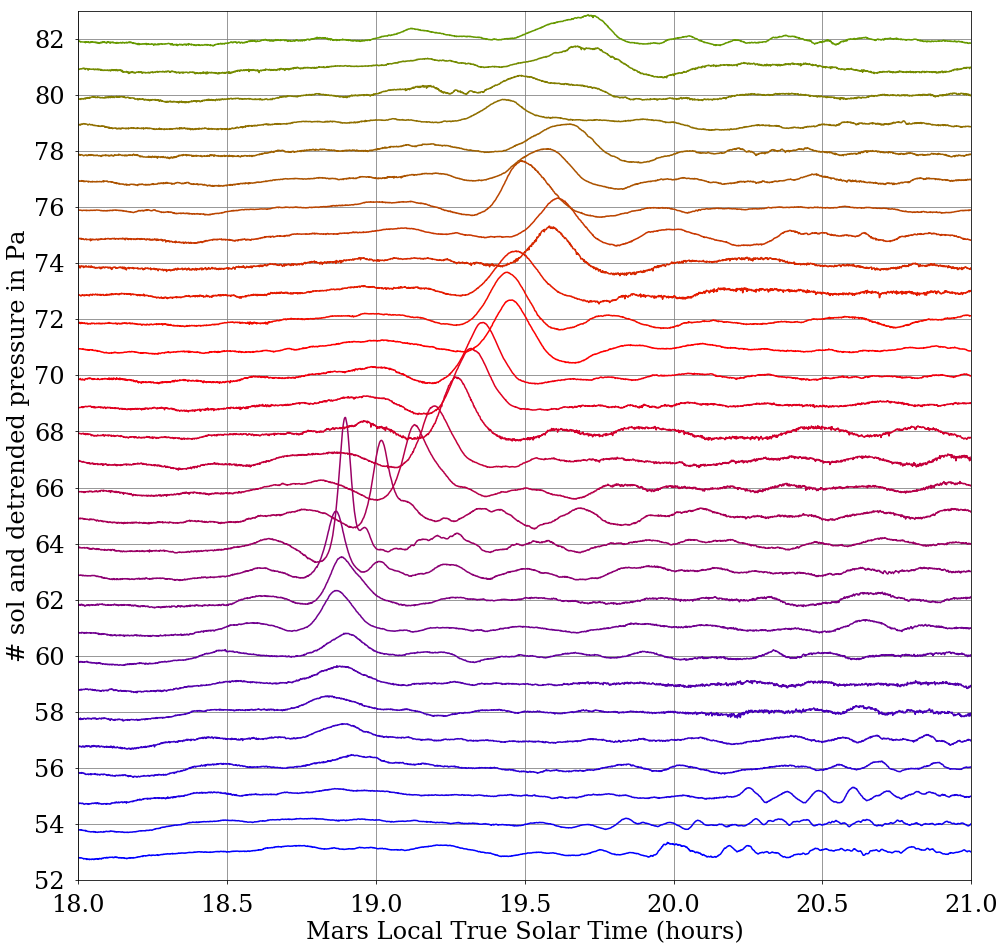

In [4]:
for iii in range(len(filenamet)):
                 
    filename = filenamet[iii]
    colorm = colormt[iii]
    solmin = solmint[iii]
    solmax = solmaxt[iii]
    mint = mintt[iii]
    maxt = maxtt[iii]

    soltab = np.arange(solmin,solmax+1,dsol)
    ####
    pal = get_cmap(name=colorm)
    coltab = [pal(i) for i in np.linspace(0,0.8,soltab.size)]
    count = 0
    ####
    ppplot.changefont(24)
    fig = ppplot.figuref(x=16,y=16)  ## (x=16,y=12)
    pl = ppplot.plot1d(fig=fig)
    pl.marker = ""
    pl.xlabel = "Mars Local True Solar Time (hours)"
    pl.ylabel = "# sol and detrended pressure in Pa"
    pl.xmin = mint + 0.5
    pl.xmax = maxt - 0.5
    pl.nxticks = (pl.xmax - pl.xmin)*2
    pl.ymin = solmin - 1
    pl.ymax = solmax + 1
    pl.nyticks = (pl.ymax - pl.ymin + 1)/2.
    ####
    for sol in soltab:
        try:
            data = apss_lib.getsol(sol,var="PRE",distant=True)   
            datalim = apss_lib.reduced_data(data,mint=mint,maxt=maxt,timetype=timetype)
            pl.f, pl.x = apss_lib.plotvar(datalim,code=["PRE"],mint=mint,maxt=maxt,window=ww,isplot=False,timetype=timetype)    
            ###
            pl.f = pl.f + sol
            pl.color = coltab[count]
            count = count + 1
            ###
            pl.f = pl.f[::10] # for a lighter uncompressed figure
            pl.x = pl.x[::10] # for a lighter uncompressed figure
            pl.make()
            del(data)
        except:
            pass
    ####
    ppplot.save(filename=filename,mode="pdf")